In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('10-diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.info()
df.drop('Unnamed: 0',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: xlabel='carat', ylabel='price'>

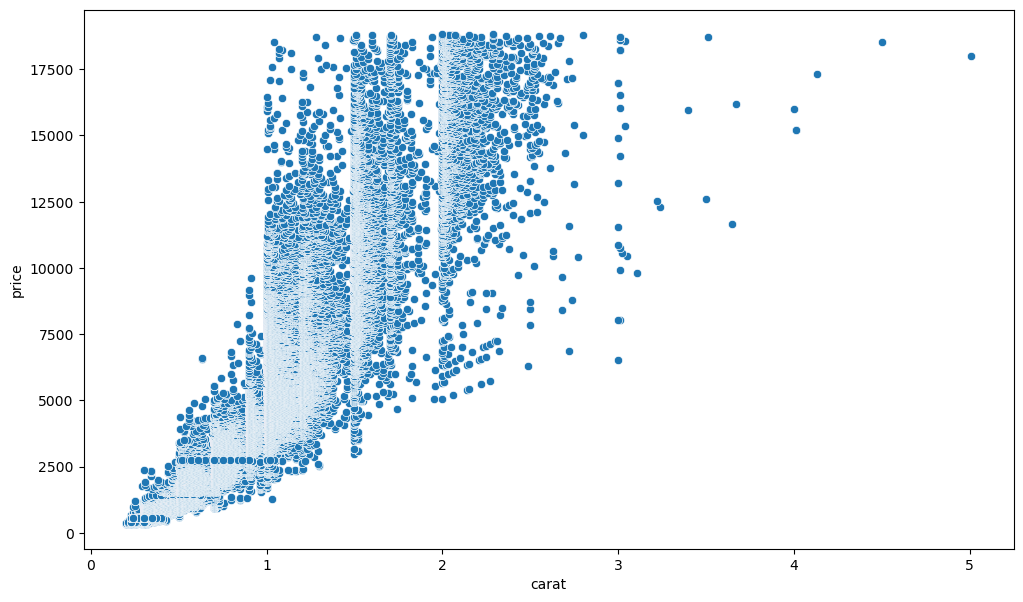

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x='carat',y='price')

<Axes: xlabel='table', ylabel='price'>

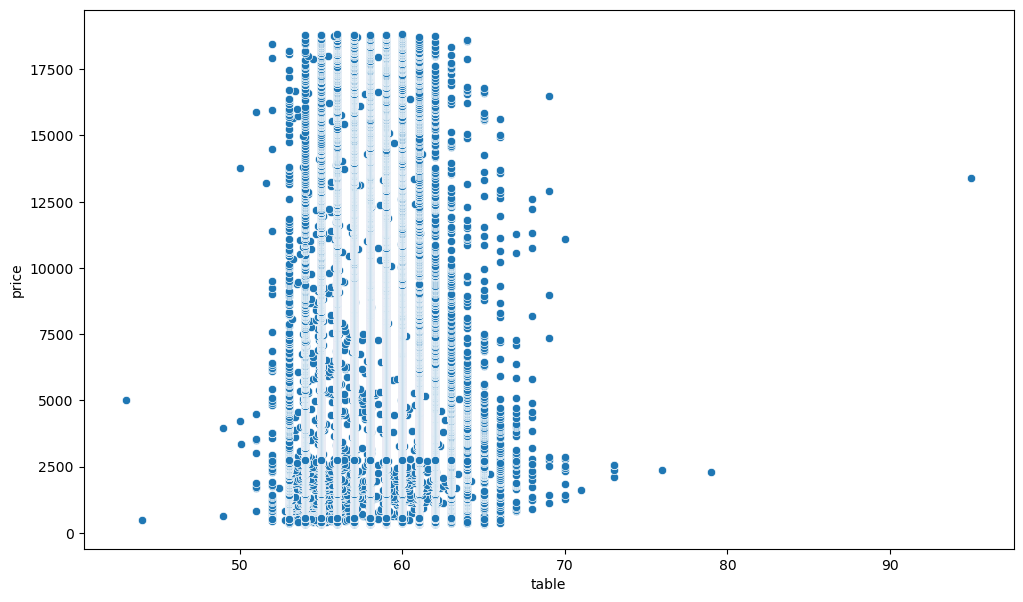

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x='table',y='price')

<Axes: xlabel='depth', ylabel='price'>

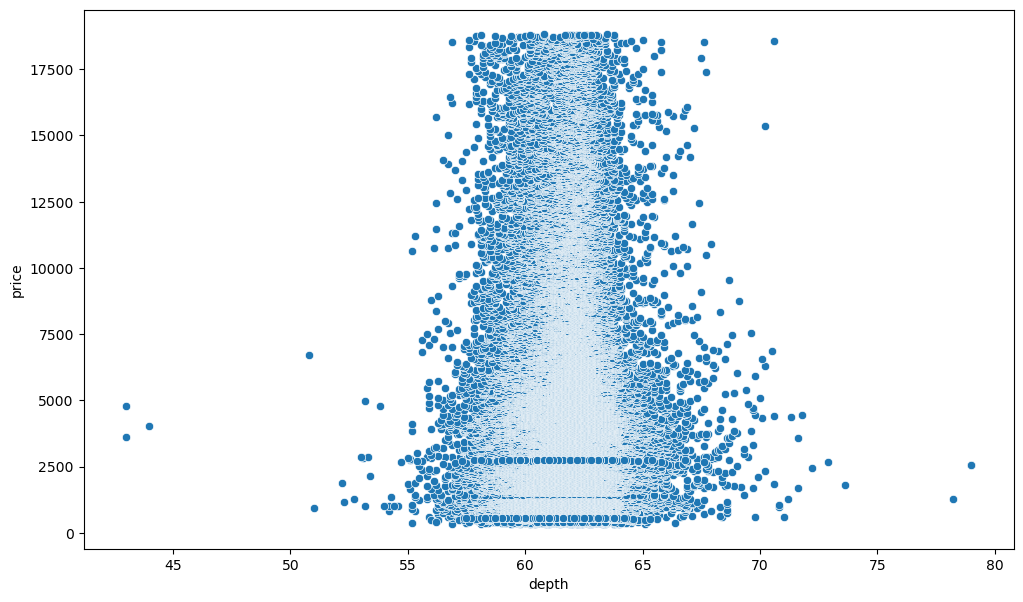

In [19]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x='depth',y='price')

In [40]:
num_cols=[x for x in df.columns if df[x].dtype=='int64']
num_cols=[x for x in df.columns if df[x].dtype=='float64']
cat_cols=[x for x in df.columns if df[x].dtype=='O']


In [42]:
for col in cat_cols:
    print(f'{col}',df[col].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [45]:
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z']

In [46]:
cat_cols

['cut', 'color', 'clarity']

In [47]:
#median ve ortlama birbirine yakınsa fazla outlier yoktur

In [52]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [54]:
outlier_xyz=[]

In [63]:
outlier_xyz=df[df['x']==0].index

In [56]:
outlier_xyz=df[df['y']==0].index

In [57]:
outlier_xyz=df[df['z']==0].index

In [61]:
outlier_xyz

Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951, 24394,
       24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556, 49557, 51506],
      dtype='int64')

In [64]:
df.drop(outlier_xyz,axis=0,inplace=True)

In [65]:
df.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [66]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

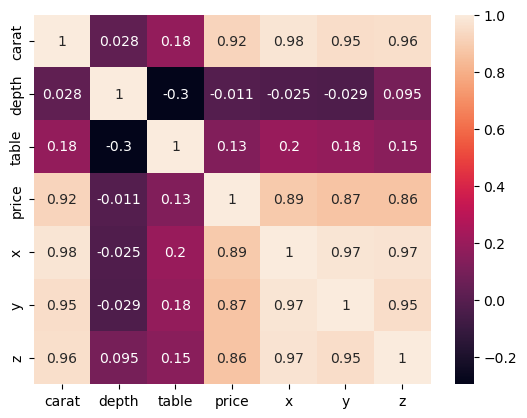

In [68]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

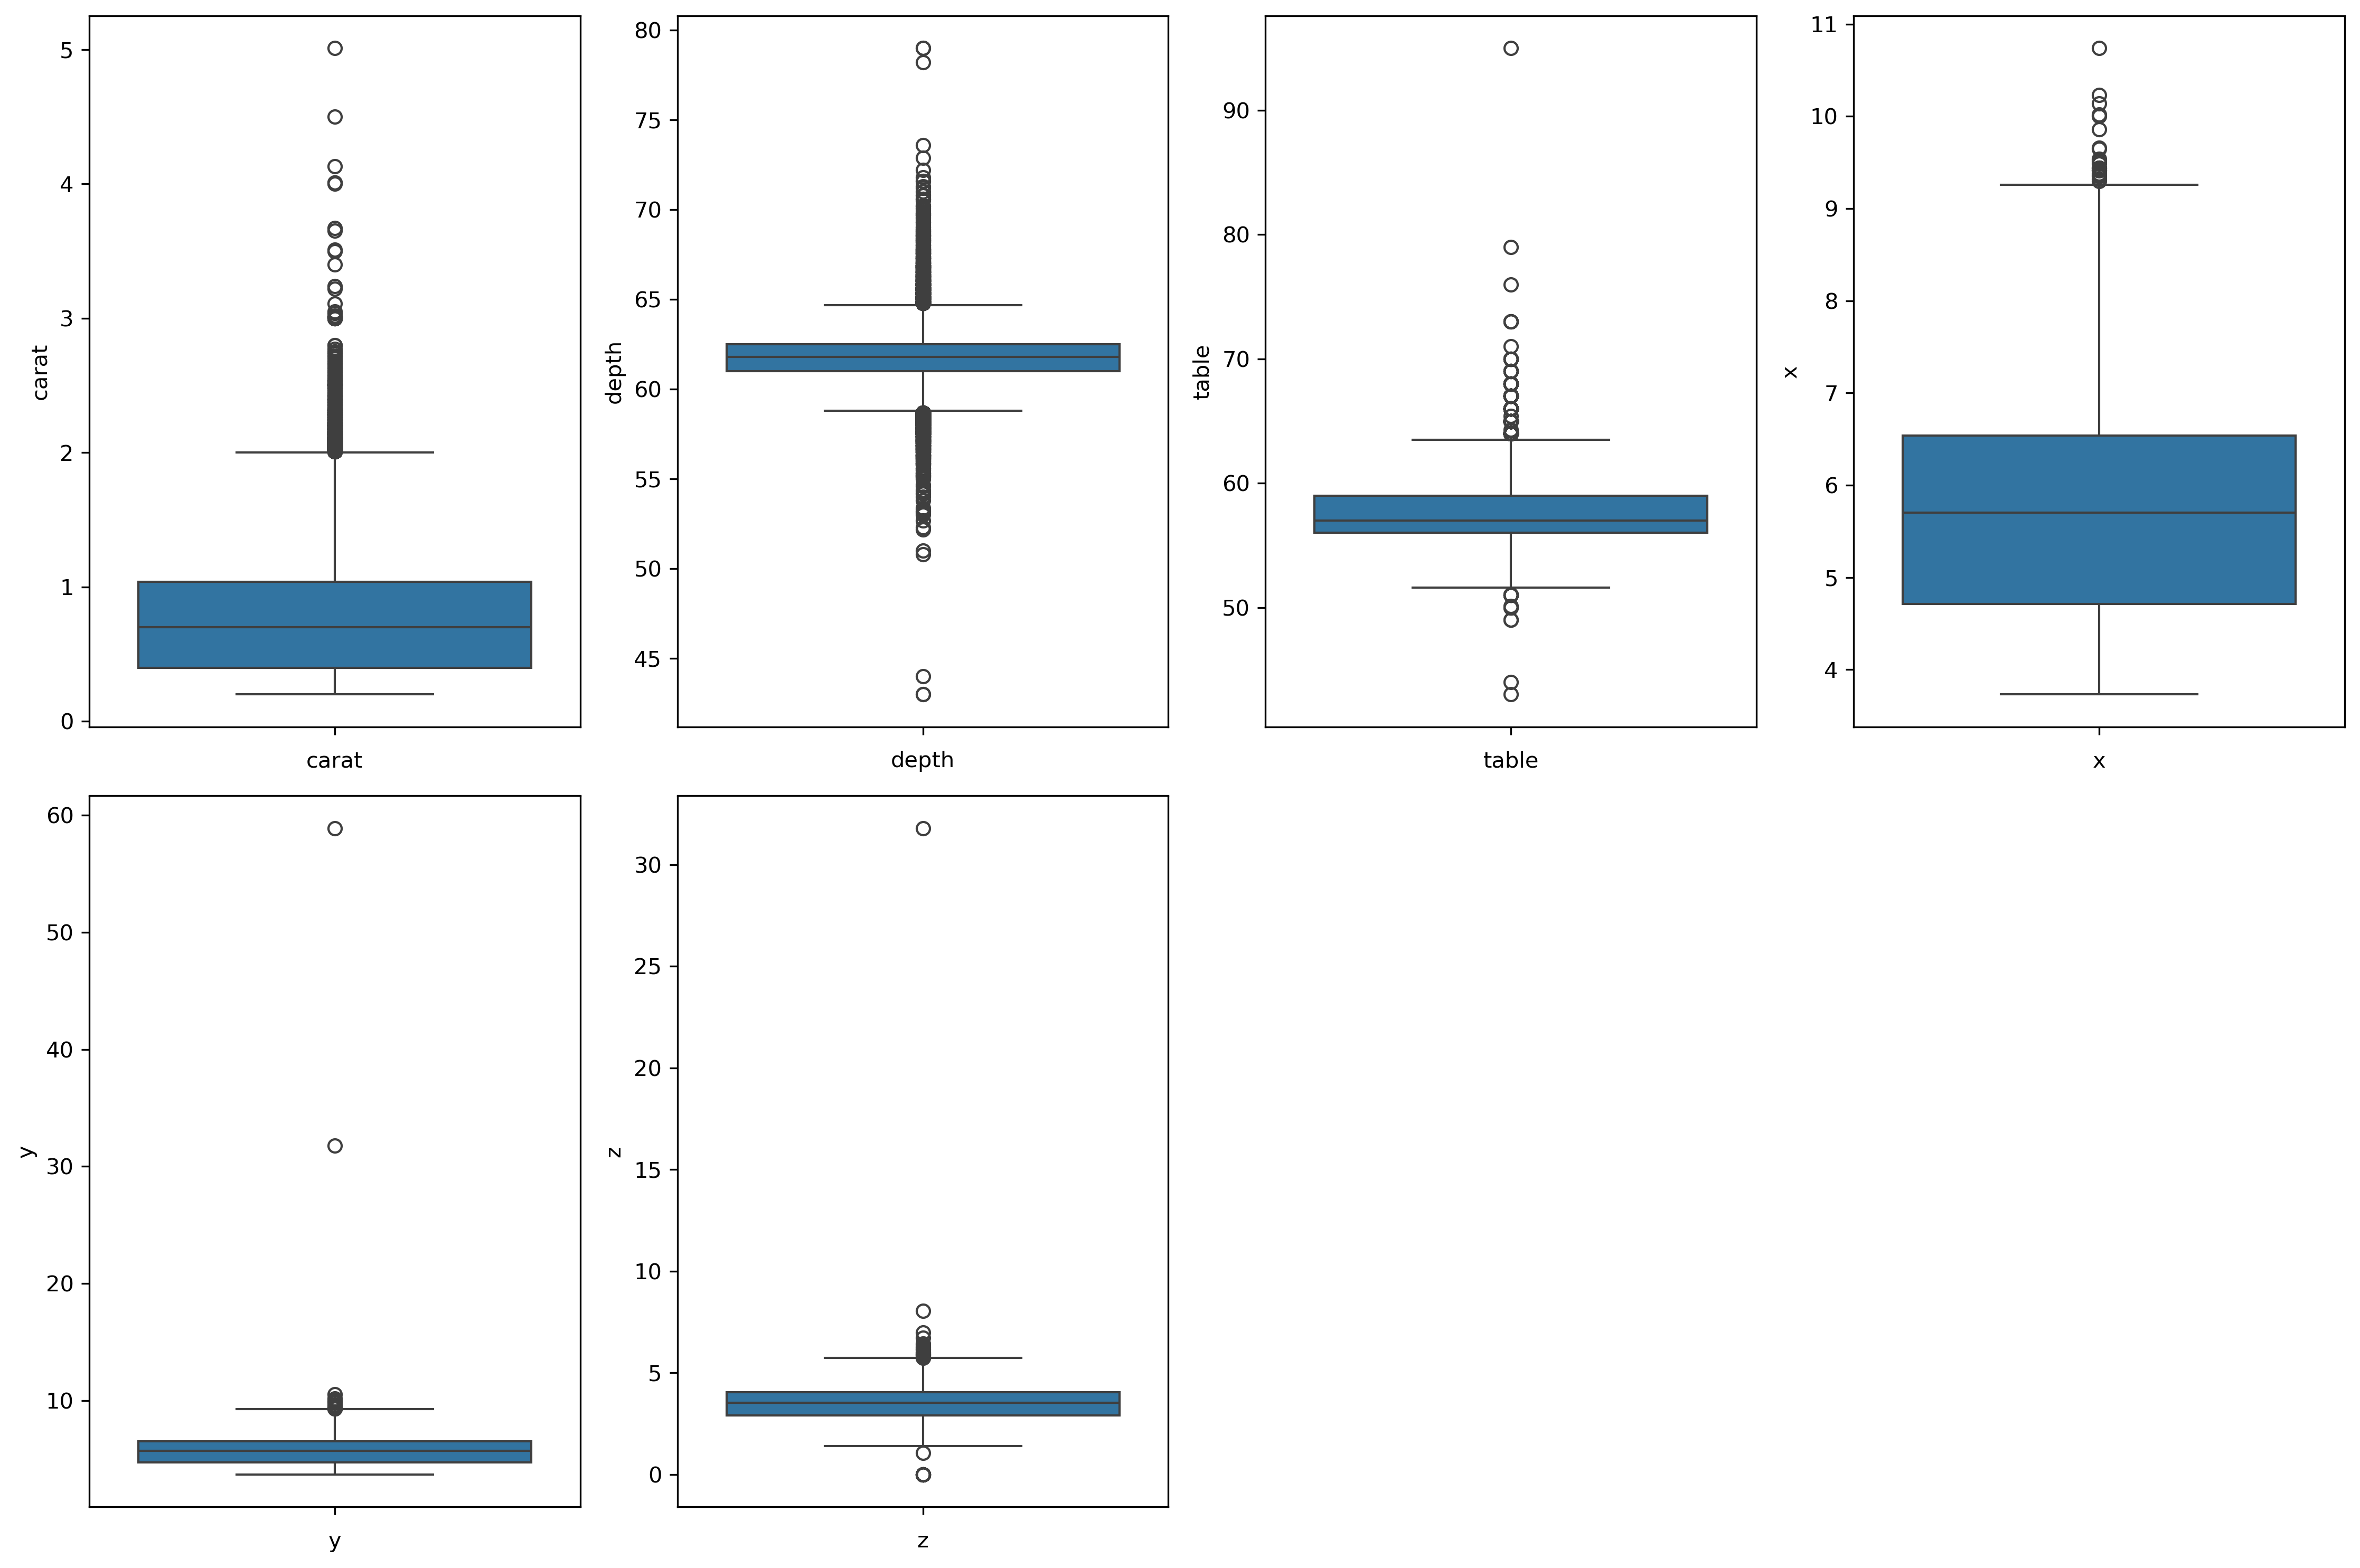

In [78]:
plt.figure(figsize=(15,10),dpi=300)
for i in range(0,len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.xlabel(num_cols[i])
    plt.tight_layout()

plt.show()

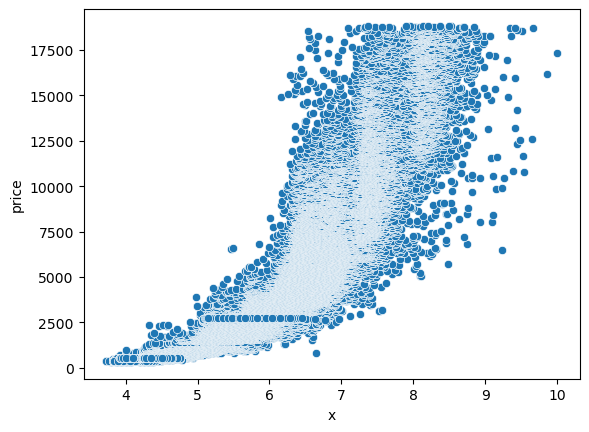

In [92]:
sns.scatterplot(x=df['x'],y=df['price'])
plt.show()

In [85]:
df.drop(df[df['x']>10].index,axis=0,inplace=True)

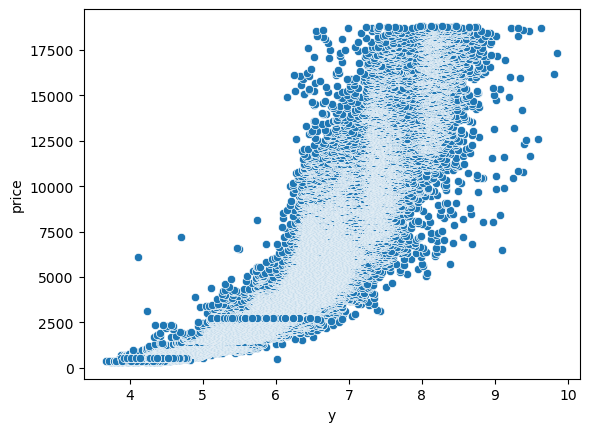

In [91]:
sns.scatterplot(x=df['y'],y=df['price'])
plt.show()

In [86]:
df.drop(df[df['y']>30].index,axis=0,inplace=True)

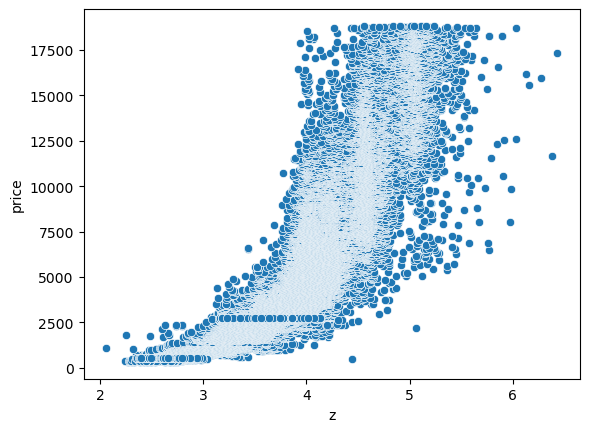

In [90]:
sns.scatterplot(x=df['z'],y=df['price'])
plt.show()

In [87]:
df.drop(df[df['z']>18].index,axis=0,inplace=True)
df.drop(df[df['z']<2].index,axis=0,inplace=True)

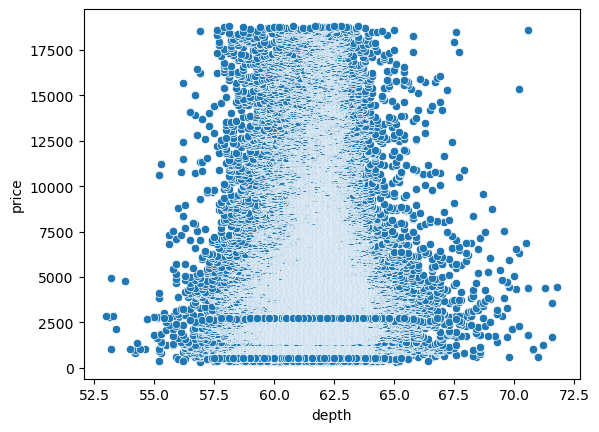

In [89]:
sns.scatterplot(x=df['depth'],y=df['price'])
plt.show()

In [88]:
df.drop(df[df['depth']>72].index,axis=0,inplace=True)
df.drop(df[df['depth']<53].index,axis=0,inplace=True)

In [93]:
df=pd.get_dummies(df,columns=cat_cols,drop_first=True,dtype=int)

In [94]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [95]:
X=df.drop('price',axis=1)
y=df['price']

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler=StandardScaler()

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [100]:
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

In [101]:
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [103]:
from sklearn.svm import SVR

In [104]:
model=SVR()

In [105]:
param_grid={
    'kernel':['rbf','linear','sigmoid'],
    'degree':[0,1,2,3,4,5,6,7],
    'C':[10,1,0.1,0.01,0.001],
    'gamma':['scale','auto']
    
    


    
}

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
cv=RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=5)

In [ ]:
cv.fit(X_train,y_train)